In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
%matplotlib inline

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving StockX-Data-Contest-2019-3.csv.zip to StockX-Data-Contest-2019-3.csv.zip


In [ ]:
import pandas as pd
df = pd.read_csv('StockX-Data-Contest-2019-3.csv.zip')
df

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$565,$220,12/26/18,8.0,Oregon
99952,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$598,$220,12/26/18,8.5,California
99953,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$605,$220,12/26/18,5.5,New York
99954,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$650,$220,12/26/18,11.0,California


In [ ]:
df.shape

(99956, 8)

In [ ]:
df.dtypes

,0
Order Date,object
Brand,object
Sneaker Name,object
Sale Price,object
Retail Price,object
Release Date,object
Shoe Size,float64
Buyer Region,object


In [ ]:
df.describe()

,Shoe Size
count,99956.000000
mean,9.344181
std,2.329588
min,3.500000
25%,8.000000
50%,9.500000
75%,11.000000
max,17.000000


In [ ]:
# Checking for null values
nulls = pd.concat([df.isnull().sum()], axis=1)
nulls[nulls.sum(axis=1) > 0]

,0


In [ ]:
# Change 'order date' dtype
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df.head()

ValueError: time data "9/1/17" doesn't match format "%m/%d/%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
# Change 'order date' dtype
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y') # Use %y for two-digit year format
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island


In [ ]:
# Remove - from sneaker name
df['Sneaker Name'] = df['Sneaker Name'].apply(lambda x: x.replace('-', ' '))
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,"$1,097",$220,9/24/16,11.0,California
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,$685,$220,11/23/16,11.0,California
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,$690,$220,11/23/16,11.0,California
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,$828,$220,2/11/17,11.0,Rhode Island


In [ ]:
# Remove $ and comma from sale price
df['Sale Price'] = df['Sale Price'].apply(lambda x: x.replace('$', ''))
df['Sale Price'] = df['Sale Price'].apply(lambda x: x.replace(',', ''))
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,$220,9/24/16,11.0,California
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,$220,11/23/16,11.0,California
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,$220,11/23/16,11.0,California
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,$220,11/23/16,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,$220,2/11/17,11.0,Rhode Island


In [ ]:
# Remove $ from retail price
df['Retail Price'] = df['Retail Price'].apply(lambda x: x.replace('$', ''))
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,9/24/16,11.0,California
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,11/23/16,11.0,California
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,11/23/16,11.0,California
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,11/23/16,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2/11/17,11.0,Rhode Island


In [ ]:
df.dtypes

,0
Order Date,datetime64[ns]
Brand,object
Sneaker Name,object
Sale Price,object
Retail Price,object
Release Date,object
Shoe Size,float64
Buyer Region,object


In [ ]:
# Converting some object columns into numerical columns
obj_cols = ['Sale Price','Retail Price']
for col in obj_cols:
    df[str(col)] = pd.to_numeric(df[str(col)])

In [ ]:
df.dtypes

,0
Order Date,datetime64[ns]
Brand,object
Sneaker Name,object
Sale Price,int64
Retail Price,int64
Release Date,object
Shoe Size,float64
Buyer Region,object


EDA

In [ ]:
df.columns

Index(['Order Date', 'Brand', 'Sneaker Name', 'Sale Price', 'Retail Price',
       'Release Date', 'Shoe Size', 'Buyer Region'],
      dtype='object')

In [ ]:
# Make Bought For Less Than Retail column
df['Bought for Less Than Retail'] = df['Sale Price'] < df['Retail Price']
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Bought for Less Than Retail
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,9/24/16,11.0,California,False
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,11/23/16,11.0,California,False
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,11/23/16,11.0,California,False
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,11/23/16,11.5,Kentucky,False
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2/11/17,11.0,Rhode Island,False


In [ ]:
# Make Bought For Retail column
df['Bought for Retail'] = df['Sale Price'] == df['Retail Price']
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Bought for Less Than Retail,Bought for Retail
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,9/24/16,11.0,California,False,False
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,11/23/16,11.0,California,False,False
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,11/23/16,11.0,California,False,False
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,11/23/16,11.5,Kentucky,False,False
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2/11/17,11.0,Rhode Island,False,False


In [ ]:
# Make Bought For More Than Retail column
df['Bought for More Than Retail'] = df['Sale Price'] > df['Retail Price']
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Bought for Less Than Retail,Bought for Retail,Bought for More Than Retail
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,9/24/16,11.0,California,False,False,True
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,11/23/16,11.0,California,False,False,True
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,11/23/16,11.0,California,False,False,True
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,11/23/16,11.5,Kentucky,False,False,True
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2/11/17,11.0,Rhode Island,False,False,True


In [ ]:
# Convert relevant columns to numeric type, handling non-numeric values
df['Sale Price'] = pd.to_numeric(df['Sale Price'], errors='coerce')
df['Retail Price'] = pd.to_numeric(df['Retail Price'], errors='coerce')

# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)

# Option 1: Drop non-numeric columns before calculating correlations
df_numeric = df.drop(columns=non_numeric_cols)
correlations = df_numeric.corr()

Non-numeric columns: Index(['Order Date', 'Brand', 'Sneaker Name', 'Release Date', 'Buyer Region',
       'Bought for Less Than Retail', 'Bought for Retail',
       'Bought for More Than Retail'],
      dtype='object')


<ipython-input-25-bb575fbfe880>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)


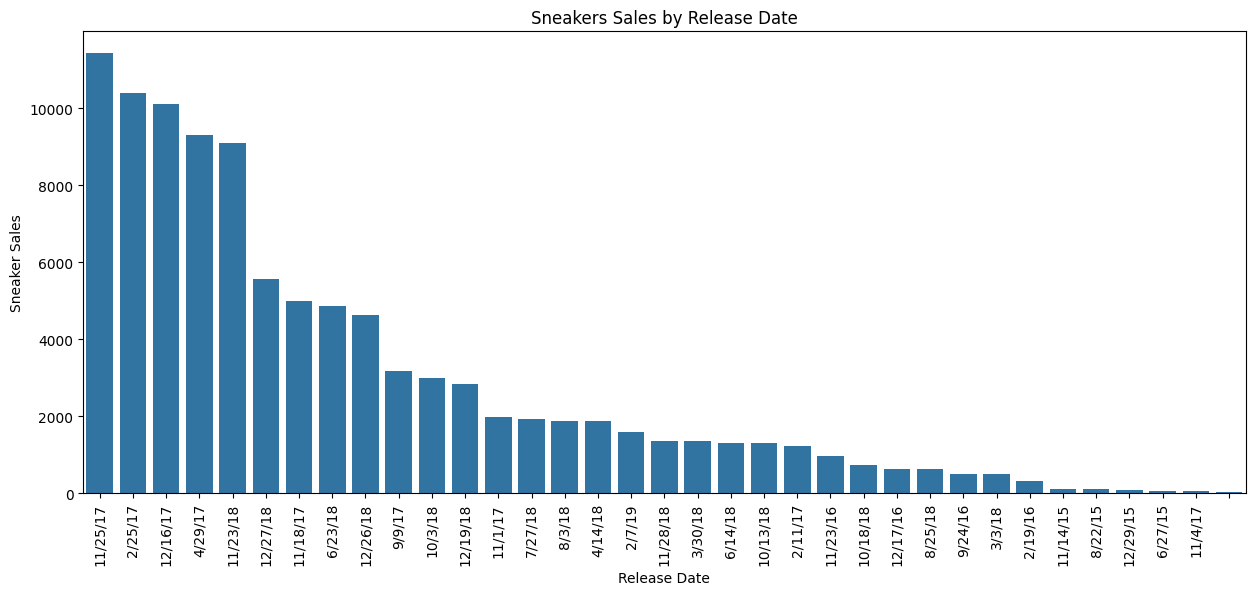

<ipython-input-25-bb575fbfe880>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)


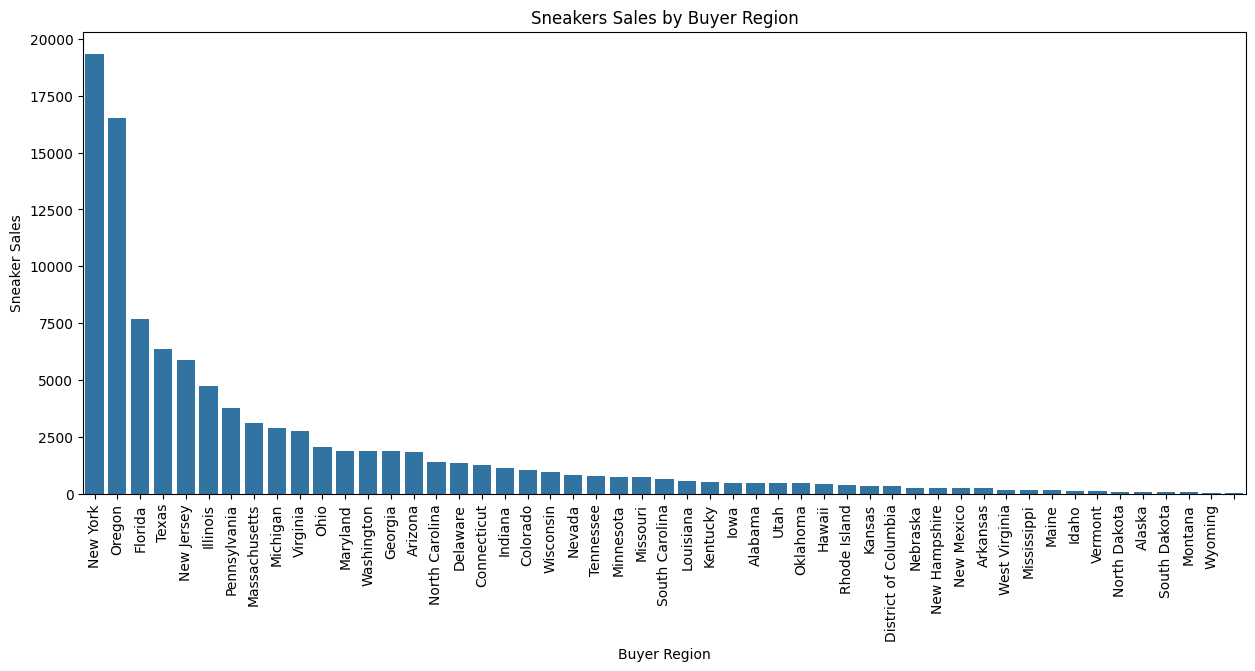

<ipython-input-25-bb575fbfe880>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)


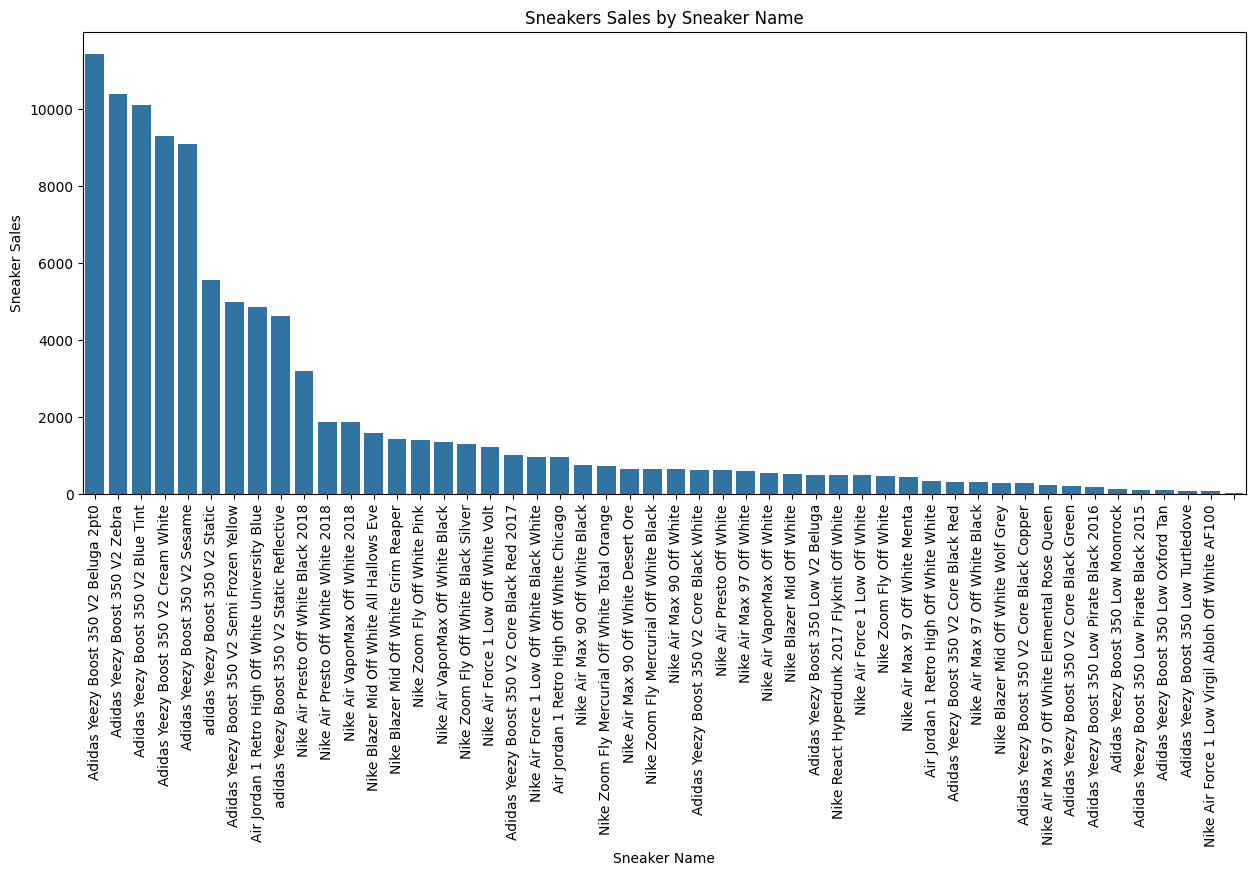

<ipython-input-25-bb575fbfe880>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)


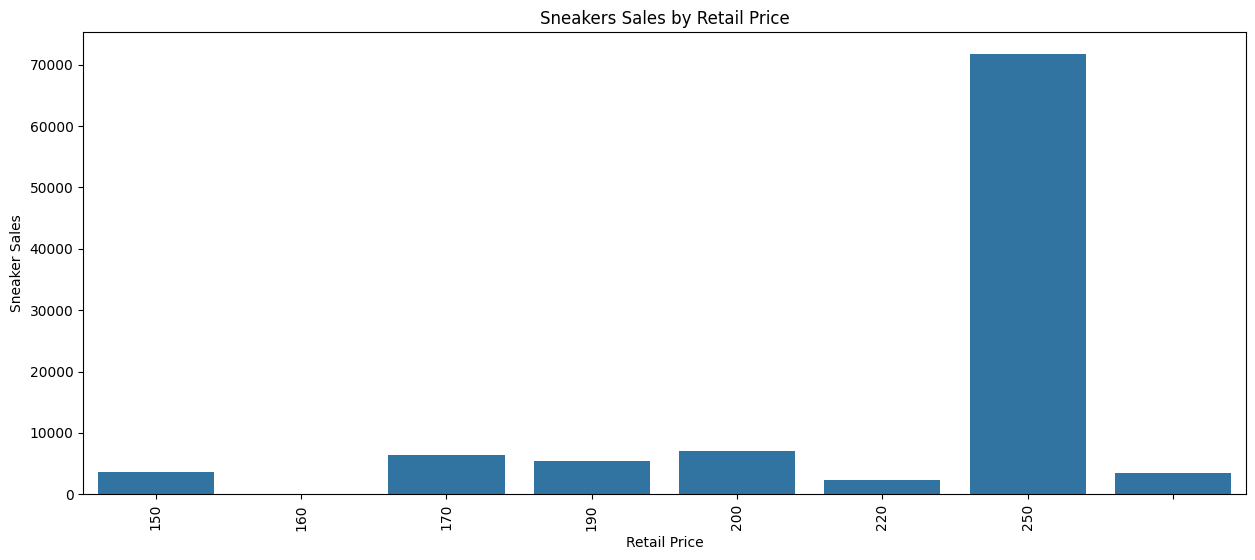

<ipython-input-25-bb575fbfe880>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)


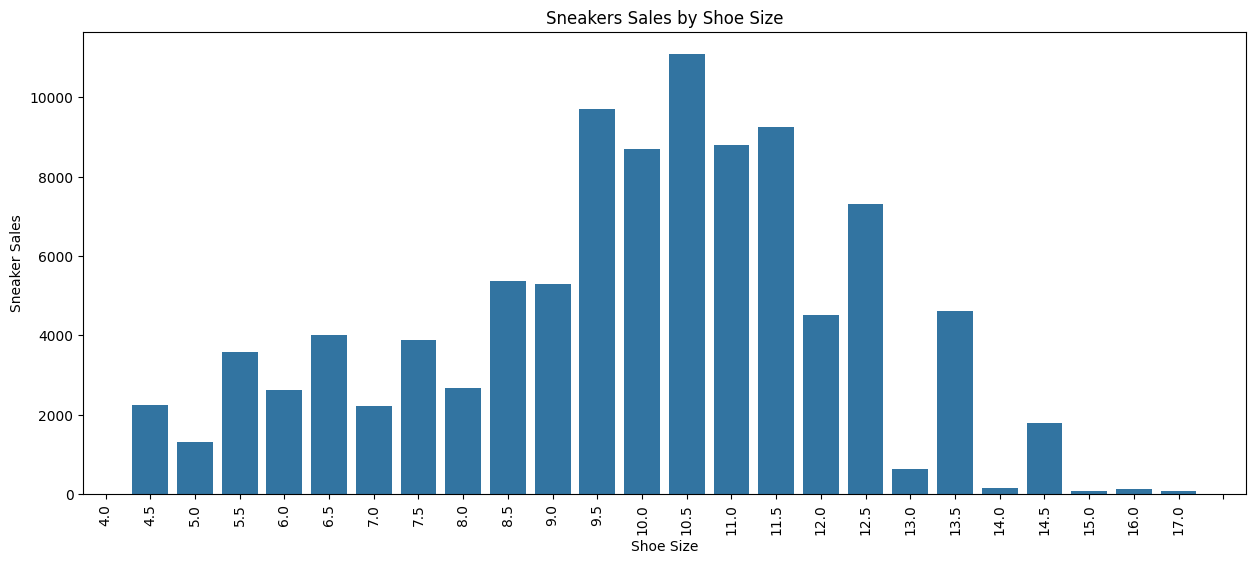

<ipython-input-25-bb575fbfe880>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)


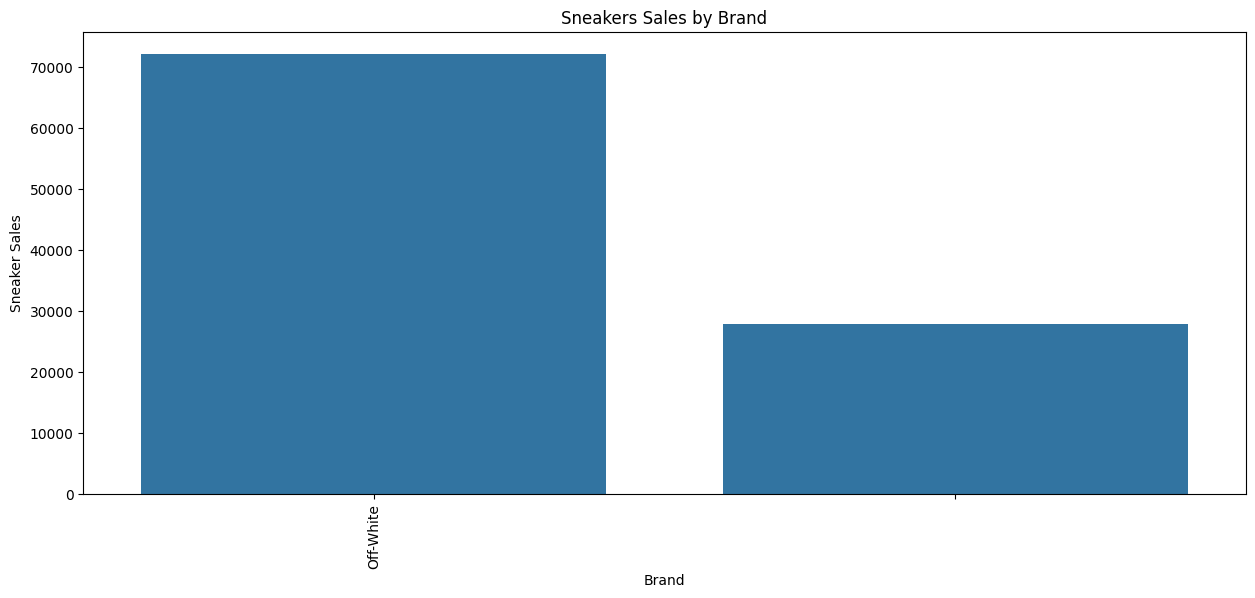

<ipython-input-25-bb575fbfe880>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)


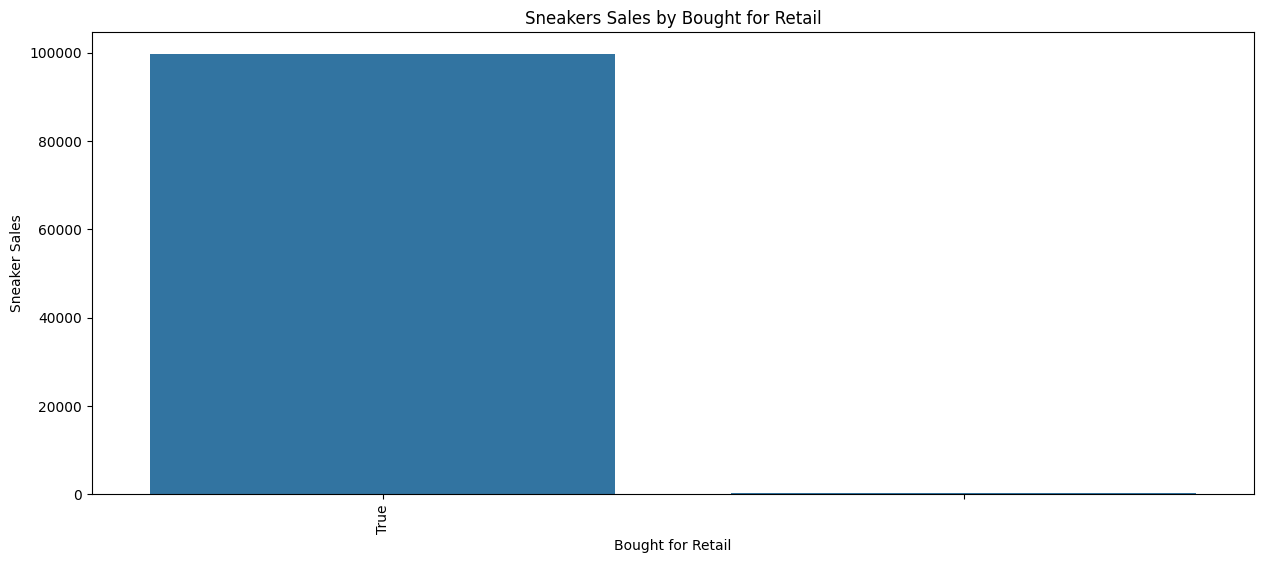

<ipython-input-25-bb575fbfe880>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)


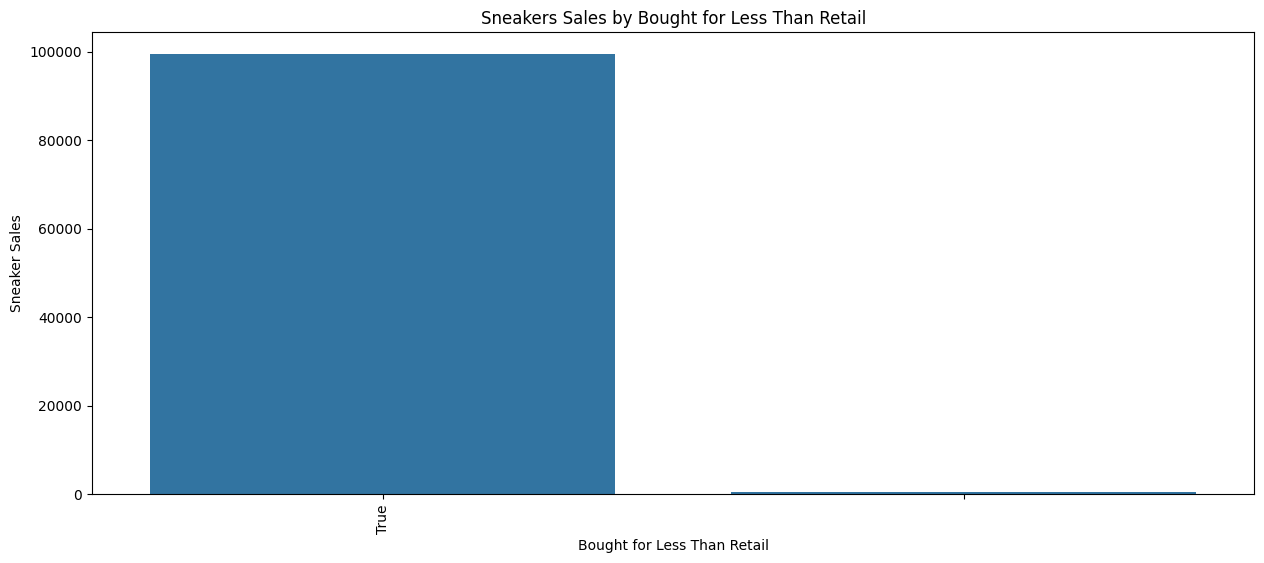

<ipython-input-25-bb575fbfe880>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)


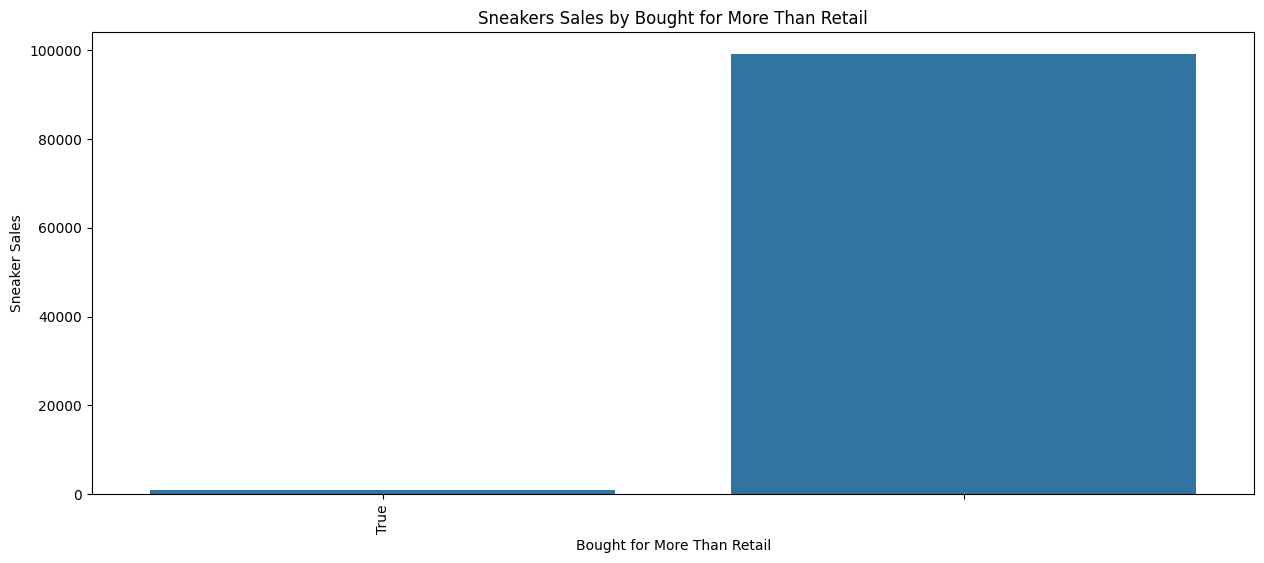

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Release date, buyer region, and sneaker name, retail price, shoe size, and brand distribution analysis
df_cat = ['Release Date', 'Buyer Region', 'Sneaker Name', 'Retail Price', 'Shoe Size', 'Brand', 'Bought for Retail', 'Bought for Less Than Retail', 'Bought for More Than Retail' ]
for cat in df_cat:
    cat_num = df[str(cat)].value_counts()
    plt.figure(figsize=(15,6))
    chart = sns.barplot(x = cat_num.index, y= cat_num)
    chart.set_title("Sneakers Sales by %s" % (cat))
    plt.ylabel("Sneaker Sales")
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
    plt.show(15)

In [ ]:
# Analyze trend between Sneaker Name & Sale price
# Create average retail price df
bruh = df[['Sneaker Name', 'Sale Price']]

# Clean up this list
sneakernames = ['adidas Yeezy Boost 350 V2 Butter',
       'Adidas Yeezy Boost 350 V2 Beluga 2pt0',
       'Adidas Yeezy Boost 350 V2 Zebra',
       'Adidas Yeezy Boost 350 V2 Blue Tint',
       'Adidas Yeezy Boost 350 V2 Cream White',
       'Adidas Yeezy Boost 350 V2 Sesame', 'adidas Yeezy Boost 350 V2 Static',
       'Adidas Yeezy Boost 350 V2 Semi Frozen Yellow',
       'Air Jordan 1 Retro High Off White University Blue',
       'adidas Yeezy Boost 350 V2 Static Reflective',
       'Nike Air Presto Off White Black 2018',
       'Nike Air Presto Off White White 2018',
       'Nike Air VaporMax Off White 2018',
       'Nike Blazer Mid Off White All Hallows Eve',
       'Nike Blazer Mid Off White Grim Reaper', 'Nike Zoom Fly Off White Pink',
       'Nike Air VaporMax Off White Black',
       'Nike Zoom Fly Off White Black Silver',
       'Nike Air Force 1 Low Off White Volt',
       'Adidas Yeezy Boost 350 V2 Core Black Red 2017',
       'Nike Air Force 1 Low Off White Black White',
       'Air Jordan 1 Retro High Off White Chicago',
       'Nike Air Max 90 Off White Black',
       'Nike Zoom Fly Mercurial Off White Total Orange',
       'Nike Air Max 90 Off White Desert Ore',
       'Nike Zoom Fly Mercurial Off White Black', 'Nike Air Max 90 Off White',
       'Adidas Yeezy Boost 350 V2 Core Black White',
       'Nike Air Presto Off White', 'Nike Air Max 97 Off White',
       'Nike Air VaporMax Off White', 'Nike Blazer Mid Off White',
       'Adidas Yeezy Boost 350 Low V2 Beluga',
       'Nike React Hyperdunk 2017 Flyknit Off White',
       'Nike Air Force 1 Low Off White', 'Nike Zoom Fly Off White',
       'Nike Air Max 97 Off White Menta',
       'Air Jordan 1 Retro High Off White White',
       'Adidas Yeezy Boost 350 V2 Core Black Red',
       'Nike Air Max 97 Off White Black',
       'Nike Blazer Mid Off White Wolf Grey',
       'Adidas Yeezy Boost 350 V2 Core Black Copper',
       'Nike Air Max 97 Off White Elemental Rose Queen',
       'Adidas Yeezy Boost 350 V2 Core Black Green',
       'Adidas Yeezy Boost 350 Low Pirate Black 2016',
       'Adidas Yeezy Boost 350 Low Moonrock',
       'Adidas Yeezy Boost 350 Low Pirate Black 2015',
       'Adidas Yeezy Boost 350 Low Oxford Tan',
       'Adidas Yeezy Boost 350 Low Turtledove',
       'Nike Air Force 1 Low Virgil Abloh Off White AF100'
       ]
avgs = []
for name in sneakernames:
    shoerow = bruh.loc[bruh['Sneaker Name'] == name]
    avgs.append(shoerow.mean()[0])
AvgPrice = pd.Series(avgs)
SneakerName = pd.Series(sneakernames)
avgprice_df = pd.DataFrame(columns = ['Sneaker_Name', 'Average_Price'])
avgprice_df['Sneaker_Name'] = SneakerName
avgprice_df['Average_Price'] = AvgPrice

# Crerating visual of average shoe price
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
chart = sns.barplot(x = avgprice_df['Sneaker_Name'] , y= avgprice_df['Average_Price'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

TypeError: Could not convert ['adidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butteradidas Yeezy Boost 350 V2 Butter'] to numeric

In [ ]:
avgs_2 = []
bds = df[['Brand', 'Sale Price']]
brands = [' Yeezy', 'Off-White']
for brand in brands:
    brandrow = bds.loc[bds['Brand'] == str(brand)]
    avgs_2.append(brandrow['Sale Price'].mean())
print('Yeezy average price: $' + str(avgs_2[0]))
print('Off-White average price: $' + str(avgs_2[1]))

Yeezy average price: $360.03255175854326
Off-White average price: $671.4812909260992


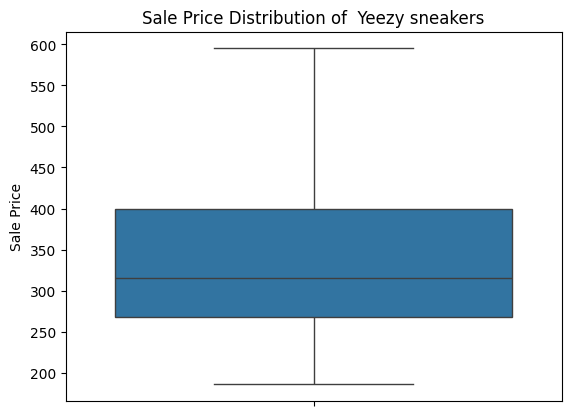

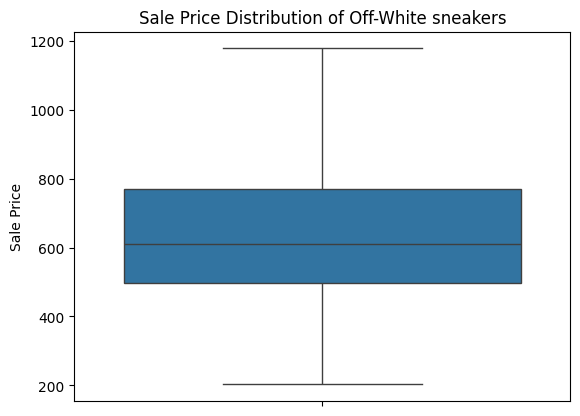

In [ ]:
# Create boxplot distribution of sales price by brand
for brand in brands:
    brandrow = bds.loc[bds['Brand'] == str(brand)]
    chart = sns.boxplot(y=brandrow["Sale Price"], showfliers = False)
    chart.set_title("Sale Price Distribution of %s sneakers" % (brand))
    plt.show()

In [ ]:
# Analyze trend between Sales Price and Order Date
# Find average sale price per day
dts = df[['Order Date', 'Sale Price']]
uniq_ord_dates = df['Order Date'].value_counts().index.tolist()
avg_3 = []

for date in uniq_ord_dates:
    daterow = dts.loc[dts['Order Date'] == str(date)]
    avg_3.append(daterow['Sale Price'].mean())

unq_dates = pd.Series(uniq_ord_dates)
date_avgs = pd.Series(avg_3)
dateprice_df = pd.DataFrame(columns = ['Order_date', 'Average_Price'])
dateprice_df['Order_date'] = unq_dates.sort_values(ascending = True)
dateprice_df['Average_Price'] = date_avgs
dateprice_df.head()

,Order_date,Average_Price
485,2017-09-01,653.000000
516,2017-09-02,649.600000
505,2017-09-03,672.437500
503,2017-09-04,623.764706
486,2017-09-05,648.772727


Text(0.5, 1.0, 'Average Daily Sale Price Over time')

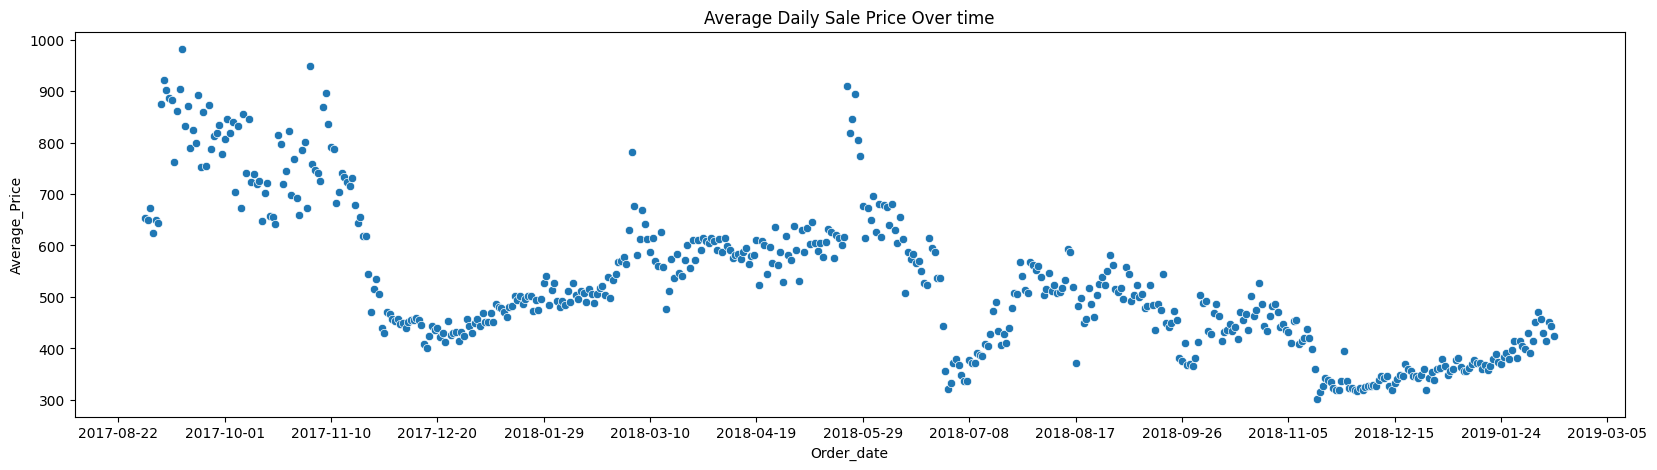

In [ ]:
# Create visualization of Average Sale Price Over time
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
chart = sns.scatterplot(x="Order_date", y="Average_Price", data=dateprice_df)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(40))
chart.set_title("Average Daily Sale Price Over time")

In [ ]:
# Finding Average Sale Price on Release Dates Over Time
dts = df[['Release Date', 'Sale Price']]
uniq_rel_dates = df['Release Date'].value_counts().index.tolist()
avg_4 = []

for date in uniq_rel_dates:
    daterow = dts.loc[dts['Release Date'] == str(date)]
    avg_4.append(daterow['Sale Price'].mean())

unq_dates = pd.Series(uniq_rel_dates)
date_avgs = pd.Series(avg_4)
dateprice_df_2 = pd.DataFrame(columns = ['Release_date', 'Average_Price'])
dateprice_df_2['Release_date'] = unq_dates.sort_values(ascending = True)
dateprice_df_2['Average_Price'] = date_avgs
dateprice_df_2.head()

,Release_date,Average_Price
21,10/13/18,316.691489
24,10/18/18,715.829114
11,10/3/18,568.006354
13,11/1/17,606.026302
30,11/14/15,996.710000


Text(0.5, 1.0, 'Average Sale Price by Buyer Region')

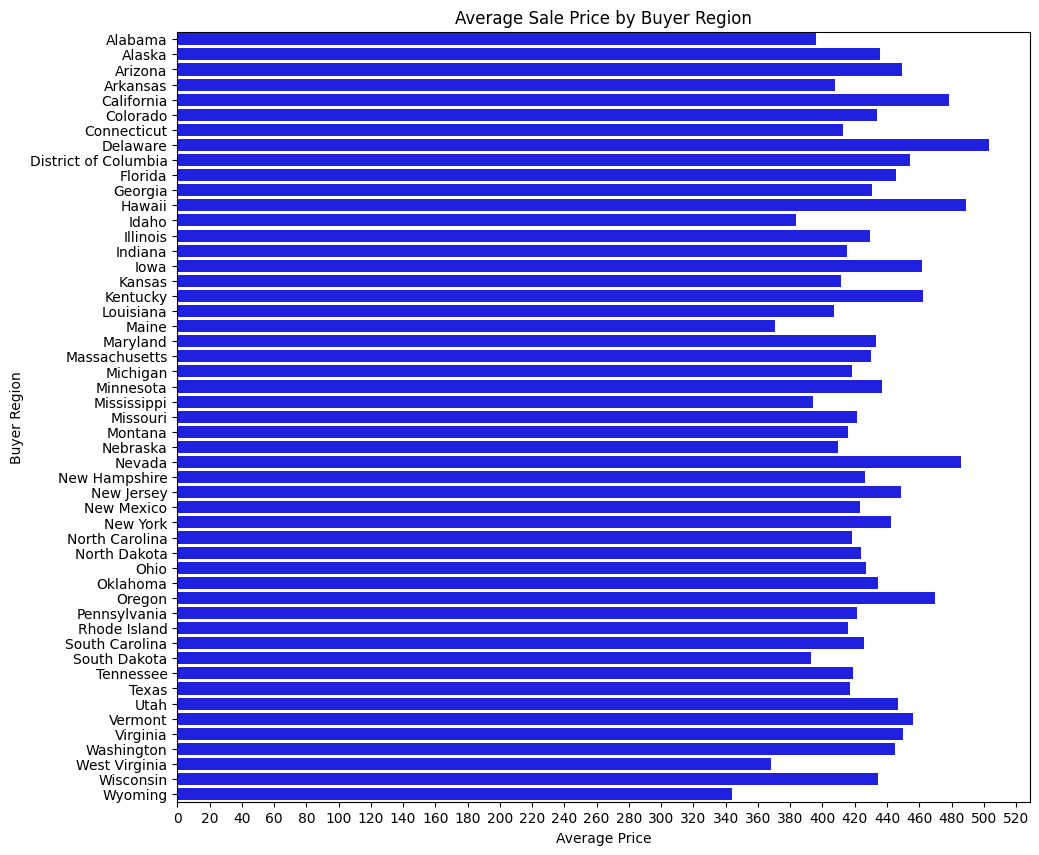

In [ ]:
# Analyze trend between buyer region and sale price

brg = df[['Buyer Region', 'Sale Price']]
unq_brgs = df['Buyer Region'].value_counts().index.tolist()
avg_5 = []

for region in unq_brgs:
    regionrow = brg.loc[brg['Buyer Region'] == str(region)]
    avg_5.append(regionrow['Sale Price'].mean())

unq_regions = pd.Series(unq_brgs)
region_avgs = pd.Series(avg_5)
regionprice_df = pd.DataFrame(columns = ['Buyer Region', 'Average Price'])
regionprice_df['Buyer Region'] = unq_regions.sort_values(ascending = True)
regionprice_df['Average Price'] = region_avgs

fig_dims = (11, 10)
fig, ax = plt.subplots(figsize=fig_dims)
chart = sns.barplot(x="Average Price", y="Buyer Region", data=regionprice_df, color="b")
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(20))
chart.set_title("Average Sale Price by Buyer Region")

Linear Regression

In [ ]:
# Renaming columns to get rid of spaces
df = df.rename(columns={
    "Order Date": "Order_date",
    "Sneaker Name": "Sneaker_Name",
    "Sale Price": "Sale_Price",
    "Retail Price": "Retail_Price",
    "Release Date": "Release_Date",
    "Shoe Size": "Shoe_Size",
    "Buyer Region": "Buyer_Region"
    })

In [ ]:
# Converting dates into numericals
import datetime as dt

df['Order_date'] = pd.to_datetime(df['Order_date'])
df['Order_date']=df['Order_date'].map(dt.datetime.toordinal)

df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Release_Date']=df['Release_Date'].map(dt.datetime.toordinal)

<ipython-input-35-d17d651f6cfe>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release_Date'] = pd.to_datetime(df['Release_Date'])


In [ ]:
# Getting spltis
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split

X = df.drop(['Sale_Price', 'Bought for More Than Retail', 'Bought for Less Than Retail', 'Bought for Retail'], axis=1)
y = df.Sale_Price
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [ ]:
# Converting categorical data to numerical
from sklearn.preprocessing import OneHotEncoder

object_cols = ['Sneaker_Name', 'Buyer_Region', 'Brand']
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Adding the column names after one hot encoding
# Use get_feature_names_out instead of get_feature_names
OH_cols_train.columns = OH_encoder.get_feature_names_out(object_cols)
OH_cols_valid.columns = OH_encoder.get_feature_names_out(object_cols)

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model 1

In [ ]:
# Starting linear regression
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(OH_X_train,y_train)

LinearRegression()

In [ ]:
# Looking at y-int
print(lm.intercept_)

3174704983614.187


In [ ]:
# Looking at coefficient scores of each variable
coeff_df = pd.DataFrame(lm.coef_, OH_X_train.columns,columns=['Coefficient'])
ranked_coeff = coeff_df.sort_values("Coefficient", ascending = False)
ranked_coeff

,Coefficient
Sneaker_Name_Nike Air VaporMax Off White 2018,8.077274e+09
Sneaker_Name_Nike Air VaporMax Off White Black,8.013116e+09
Sneaker_Name_Nike Air VaporMax Off White,7.149115e+09
Sneaker_Name_adidas Yeezy Boost 350 V2 Static,4.763279e+09
Sneaker_Name_adidas Yeezy Boost 350 V2 Static Reflective,4.759002e+09
...,...
Sneaker_Name_Nike Air Force 1 Low Virgil Abloh Off White AF100,-4.449247e+09
Sneaker_Name_Nike Blazer Mid Off White All Hallows Eve,-5.392505e+09
Sneaker_Name_Nike Blazer Mid Off White Grim Reaper,-5.392505e+09
Sneaker_Name_Nike Blazer Mid Off White Wolf Grey,-5.559317e+09


In [ ]:
import numpy as np
# Storing predictions and running evaluation metrics
predictions = lm.predict(OH_X_valid)
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_valid, predictions))
print('MSE:', metrics.mean_squared_error(y_valid, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, predictions)))

MAE: 60.06346935746955
MSE: 10835.706177891792
RMSE: 104.09469812575371


Model 2

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
lm = LinearRegression()
lm.fit(OH_X_train,y_train)
rfe = RFE(estimator=lm, n_features_to_select=10) # Specify the arguments by name
rfe = rfe.fit(OH_X_train, y_train)

In [ ]:
list(zip(OH_X_train.columns,rfe.support_,rfe.ranking_))

[('Order_date', False, 98),
 ('Retail_Price', False, 96),
 ('Release_Date', False, 95),
 ('Shoe_Size', False, 97),
 ('Sneaker_Name_Adidas Yeezy Boost 350 Low Moonrock', False, 10),
 ('Sneaker_Name_Adidas Yeezy Boost 350 Low Oxford Tan', False, 11),
 ('Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2015', False, 7),
 ('Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2016', False, 9),
 ('Sneaker_Name_Adidas Yeezy Boost 350 Low Turtledove', False, 12),
 ('Sneaker_Name_Adidas Yeezy Boost 350 Low V2 Beluga', False, 5),
 ('Sneaker_Name_Adidas Yeezy Boost 350 V2 Beluga 2pt0', True, 1),
 ('Sneaker_Name_Adidas Yeezy Boost 350 V2 Blue Tint', True, 1),
 ('Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black Copper', False, 2),
 ('Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black Green', True, 1),
 ('Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black Red', False, 8),
 ('Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black Red 2017', False, 6),
 ('Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Bla

In [ ]:
X_train_rfe = OH_X_train[OH_X_train.columns[rfe.support_]]
X_train_rfe

,Sneaker_Name_Adidas Yeezy Boost 350 V2 Beluga 2pt0,Sneaker_Name_Adidas Yeezy Boost 350 V2 Blue Tint,Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black Green,Sneaker_Name_Adidas Yeezy Boost 350 V2 Cream White,Sneaker_Name_Adidas Yeezy Boost 350 V2 Semi Frozen Yellow,Sneaker_Name_Adidas Yeezy Boost 350 V2 Sesame,Sneaker_Name_Adidas Yeezy Boost 350 V2 Zebra,Sneaker_Name_adidas Yeezy Boost 350 V2 Butter,Sneaker_Name_adidas Yeezy Boost 350 V2 Static,Sneaker_Name_adidas Yeezy Boost 350 V2 Static Reflective
76751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
91618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
71168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
67031,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
90137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6994,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    model = sm.OLS(y, X)
    results = model.fit() # fitting the model
    print(results.summary()) # model summary
    return X

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [ ]:
X_train_new = build_model(OH_X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     4019.
Date:                Wed, 14 Aug 2024   Prob (F-statistic):               0.00
Time:                        18:59:10   Log-Likelihood:            -4.8468e+05
No. Observations:               79964   AIC:                         9.696e+05
Df Residuals:                   79862   BIC:                         9.705e+05
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [ ]:
checkVIF(X_train_new)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Features,VIF
54,Sneaker_Name_adidas Yeezy Boost 350 V2 Static ...,inf
81,Buyer_Region_Montana,inf
79,Buyer_Region_Mississippi,inf
78,Buyer_Region_Minnesota,inf
77,Buyer_Region_Michigan,inf
...,...,...
31,Sneaker_Name_Nike Air Max 90 Off White Desert Ore,inf
2,Retail_Price,inf
1,Order_date,2.19
4,Shoe_Size,1.06


Model 3

In [ ]:
X_train_new = X_train_new.drop(['Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black Green',
       'Sneaker_Name_Nike Air Force 1 Low Off White',
       'Sneaker_Name_Nike Air Max 90 Off White',
       'Sneaker_Name_Nike Air VaporMax Off White Black',
       'Buyer_Region_Alabama', 'Buyer_Region_Alaska', 'Buyer_Region_Arkansas',
       'Buyer_Region_Colorado', 'Buyer_Region_Connecticut',
       'Buyer_Region_Delaware', 'Buyer_Region_District of Columbia',
       'Buyer_Region_Georgia', 'Buyer_Region_Hawaii', 'Buyer_Region_Idaho',
       'Buyer_Region_Illinois', 'Buyer_Region_Indiana', 'Buyer_Region_Iowa',
       'Buyer_Region_Kansas', 'Buyer_Region_Louisiana', 'Buyer_Region_Maine',
       'Buyer_Region_Massachusetts', 'Buyer_Region_Michigan',
       'Buyer_Region_Minnesota', 'Buyer_Region_Mississippi',
       'Buyer_Region_Missouri', 'Buyer_Region_Montana',
       'Buyer_Region_Nebraska', 'Buyer_Region_Nevada',
       'Buyer_Region_New Hampshire', 'Buyer_Region_New Jersey',
       'Buyer_Region_New Mexico', 'Buyer_Region_New York',
       'Buyer_Region_North Carolina', 'Buyer_Region_North Dakota',
       'Buyer_Region_Ohio', 'Buyer_Region_Oklahoma',
       'Buyer_Region_Pennsylvania', 'Buyer_Region_Rhode Island',
       'Buyer_Region_South Carolina', 'Buyer_Region_South Dakota',
       'Buyer_Region_Tennessee', 'Buyer_Region_Texas', 'Buyer_Region_Utah',
       'Buyer_Region_Vermont', 'Buyer_Region_Virginia',
       'Buyer_Region_Washington', 'Buyer_Region_West Virginia',
       'Buyer_Region_Wyoming'], axis=1)

In [ ]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     6998.
Date:                Wed, 14 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:07:07   Log-Likelihood:            -4.8470e+05
No. Observations:               79964   AIC:                         9.695e+05
Df Residuals:                   79905   BIC:                         9.701e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

Model 4

In [ ]:
# Dropping brand names because of collinearity
X_train_new = X_train_new.drop(['Brand_Off-White', 'Brand_ Yeezy'], axis=1)

In [ ]:
best_X_train = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     7121.
Date:                Wed, 14 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:07:14   Log-Likelihood:            -4.8470e+05
No. Observations:               79964   AIC:                         9.695e+05
Df Residuals:                   79906   BIC:                         9.701e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [ ]:
bruv = checkVIF(best_X_train)
bruv

,Features,VIF
0,const,1.705598e+09
3,Release_Date,1.686300e+02
20,Sneaker_Name_Adidas Yeezy Boost 350 V2 Zebra,3.010000e+01
49,Sneaker_Name_adidas Yeezy Boost 350 V2 Static,2.254000e+01
2,Retail_Price,2.156000e+01
19,Sneaker_Name_Adidas Yeezy Boost 350 V2 Sesame,2.100000e+01
17,Sneaker_Name_Adidas Yeezy Boost 350 V2 Cream W...,1.899000e+01
48,Sneaker_Name_adidas Yeezy Boost 350 V2 Butter,1.583000e+01
50,Sneaker_Name_adidas Yeezy Boost 350 V2 Static ...,1.488000e+01
39,Sneaker_Name_Nike Blazer Mid Off White All Hal...,1.296000e+01


I think that this is as accurate as I can get it. Now let's try it on the test data

Evaluation

In [ ]:
lm = sm.OLS(y_train, best_X_train).fit()
y_train_price = lm.predict(best_X_train)

<ipython-input-60-8e7304a2ea65>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_price), bins = 50)


Text(0.5, 0, 'Errors')

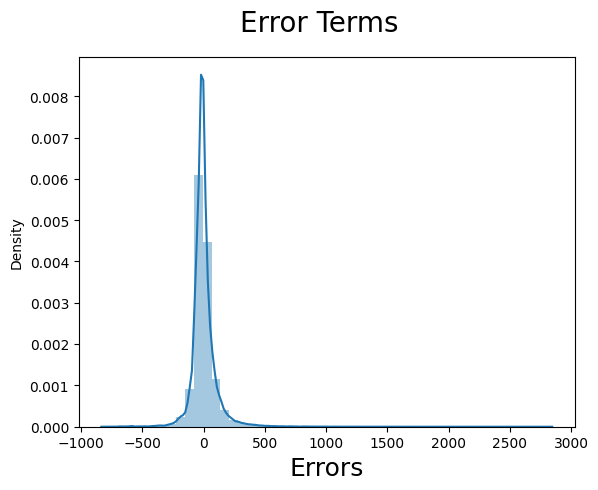

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 50)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)


In [ ]:
#Dividing into X and y
y_test = y_valid
X_test = OH_X_valid

In [ ]:
# Now let's use our model to make predictions.
X_train_new = best_X_train.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [ ]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [ ]:
# Scoring the model
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8347073582994892

Text(0, 0.5, 'y_pred')

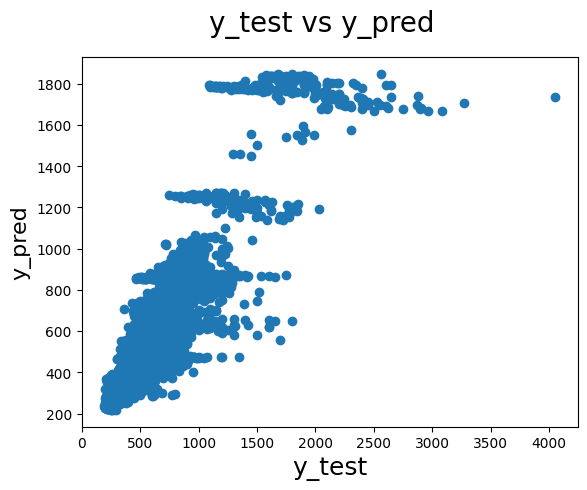

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     7121.
Date:                Wed, 14 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:11:06   Log-Likelihood:            -4.8470e+05
No. Observations:               79964   AIC:                         9.695e+05
Df Residuals:                   79906   BIC:                         9.701e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------